# Exploratory Data Analysis (EDA)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> Math : Library for Mathematical functions in Python
> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  


# Steps taken to visualise data:

### 1. Choose the variables that will help predict whether an anime will have another season. The variables we chose are "Score", "Ranked",  and "Source".

### 2. For each variable, choose the most appropriate method to display the data. eg. BoxPlot, CatPlot etc



In [1]:
# Basic Libraries
import math
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
animedata = pd.read_csv('animeTV_EDA.csv')

<AxesSubplot:xlabel='HasSequel', ylabel='Score'>

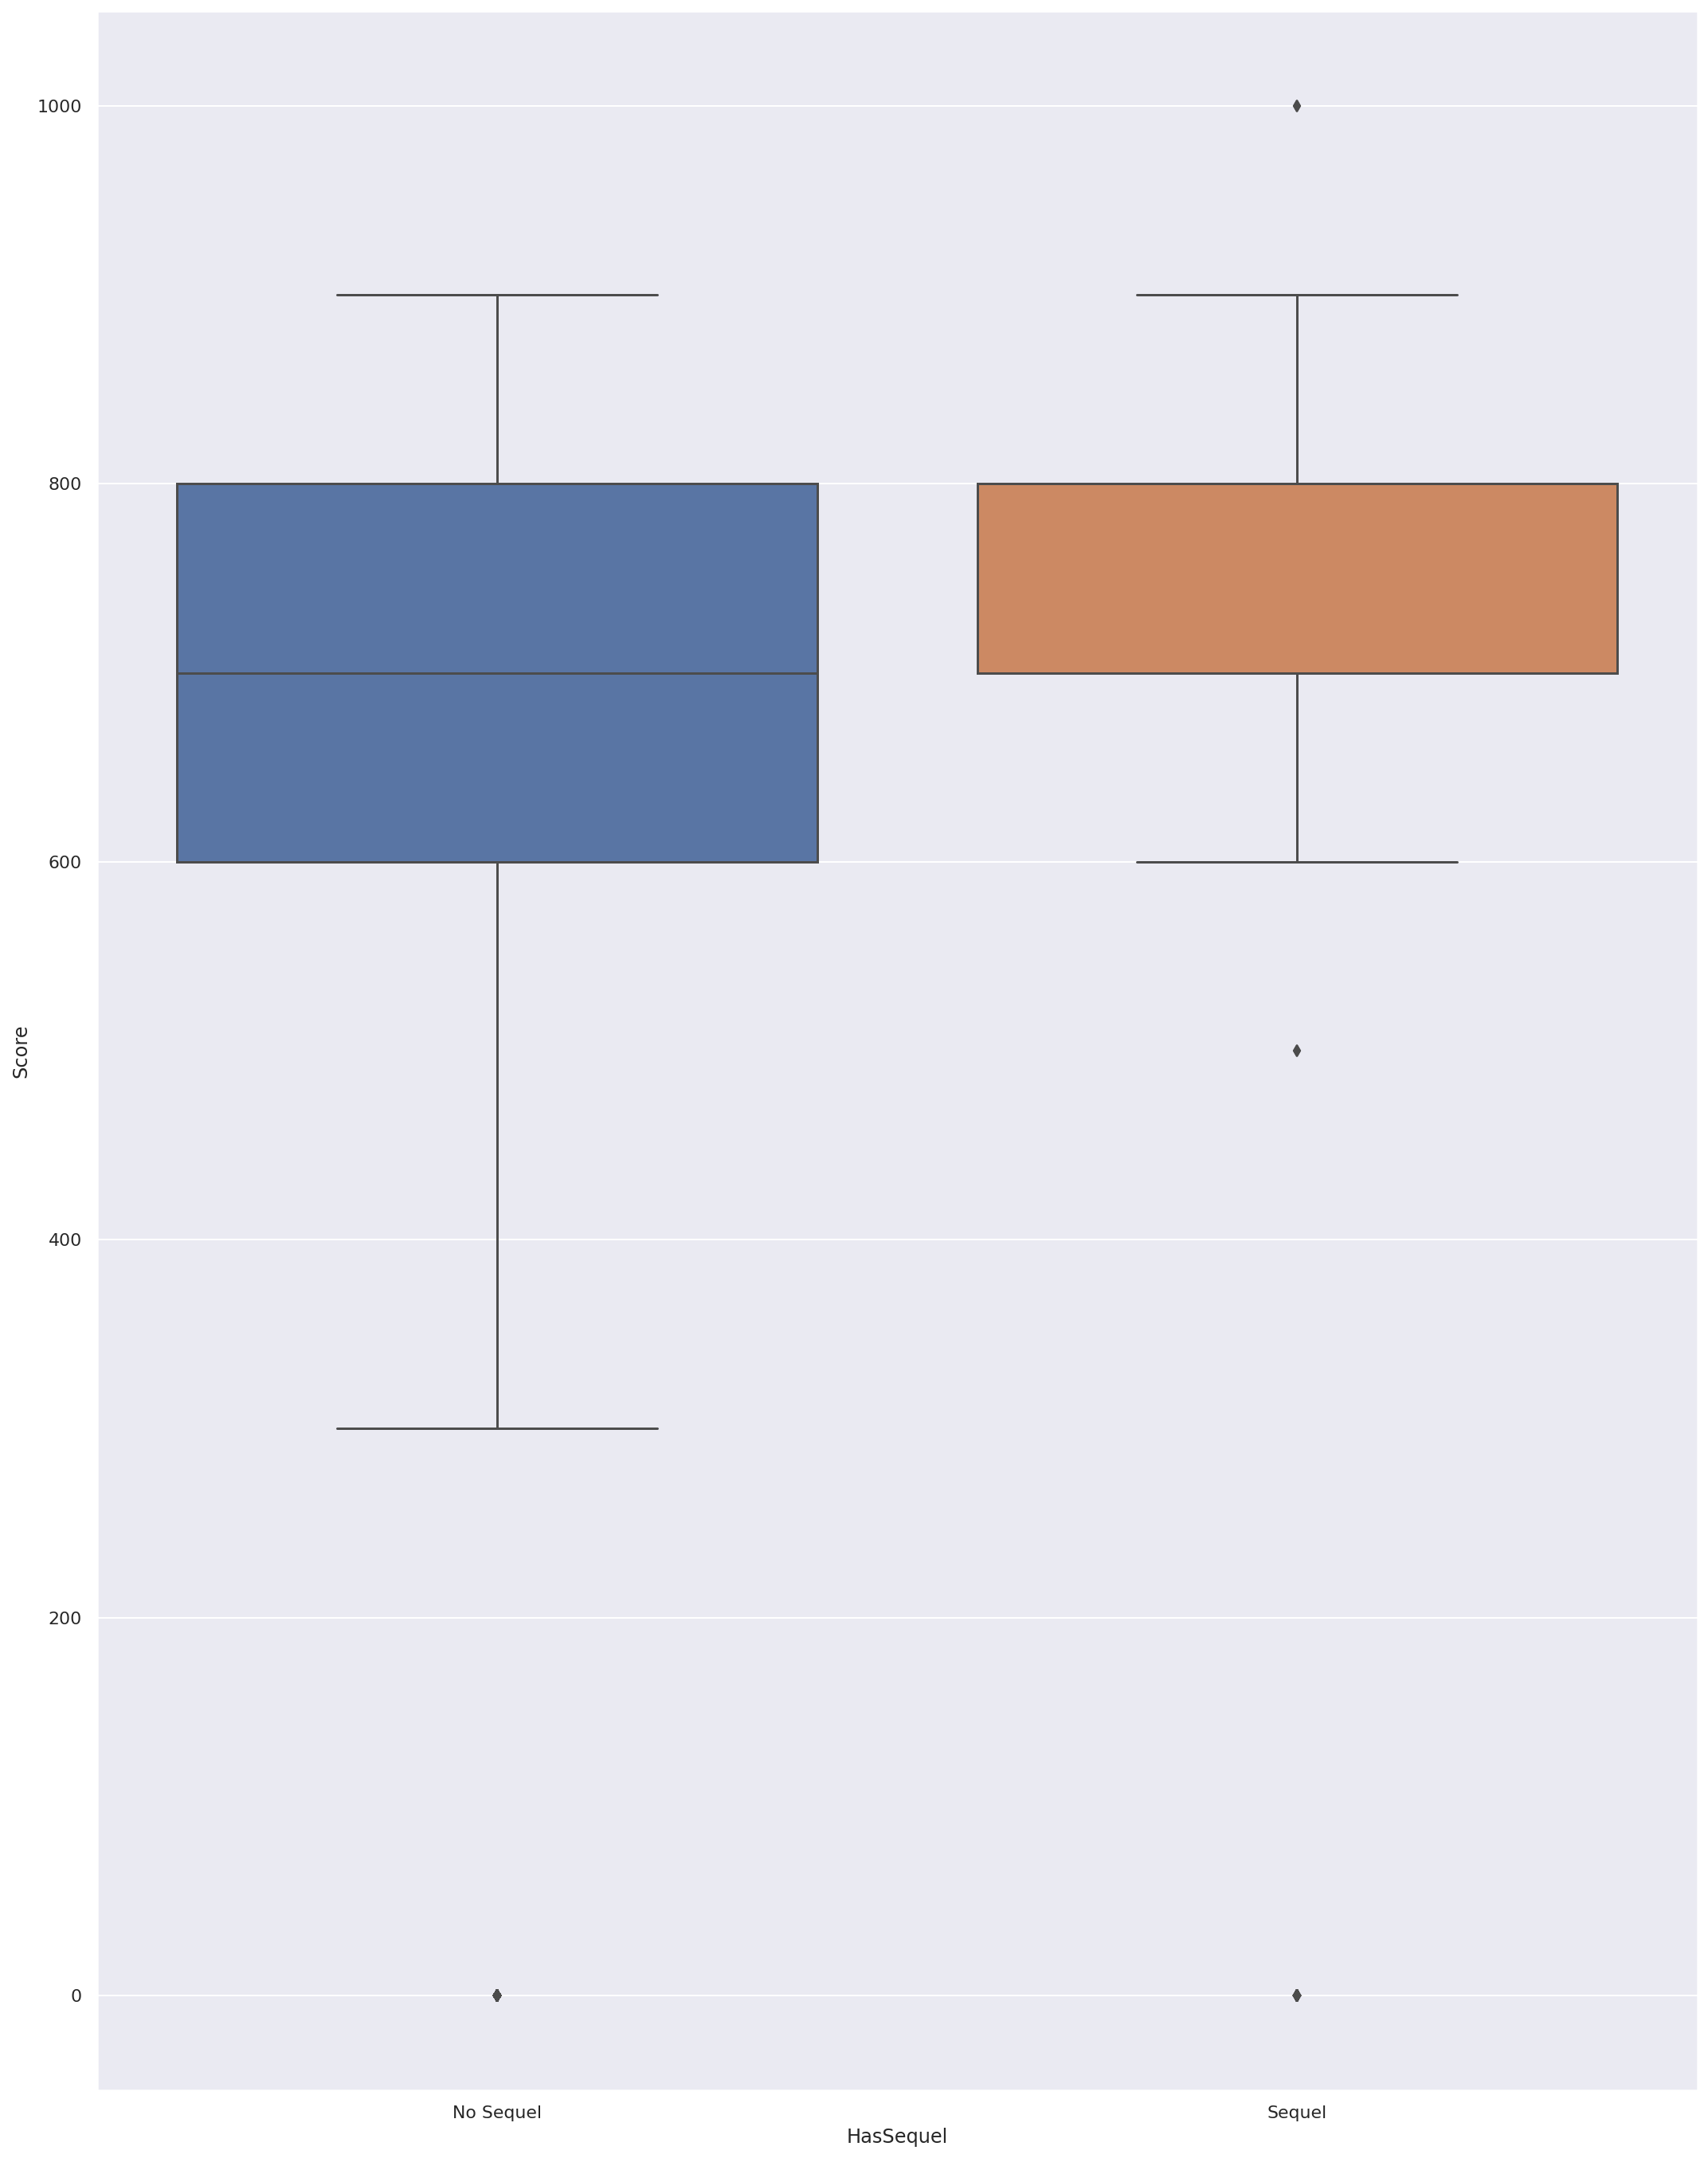

In [3]:
f, axes = plt.subplots(1, 1, figsize=(18, 24))
sb.boxplot(x = 'HasSequel', y = 'Score', data = animedata, ax = axes)

## We can tell from the figure above that animes with sequels tend to have better scores from users. This is due to the box and whisker plots being narrower and being positioned closer to the max score. It also has a lower Q1 score and a higher mean score.



<AxesSubplot:xlabel='HasSequel', ylabel='Ranked'>

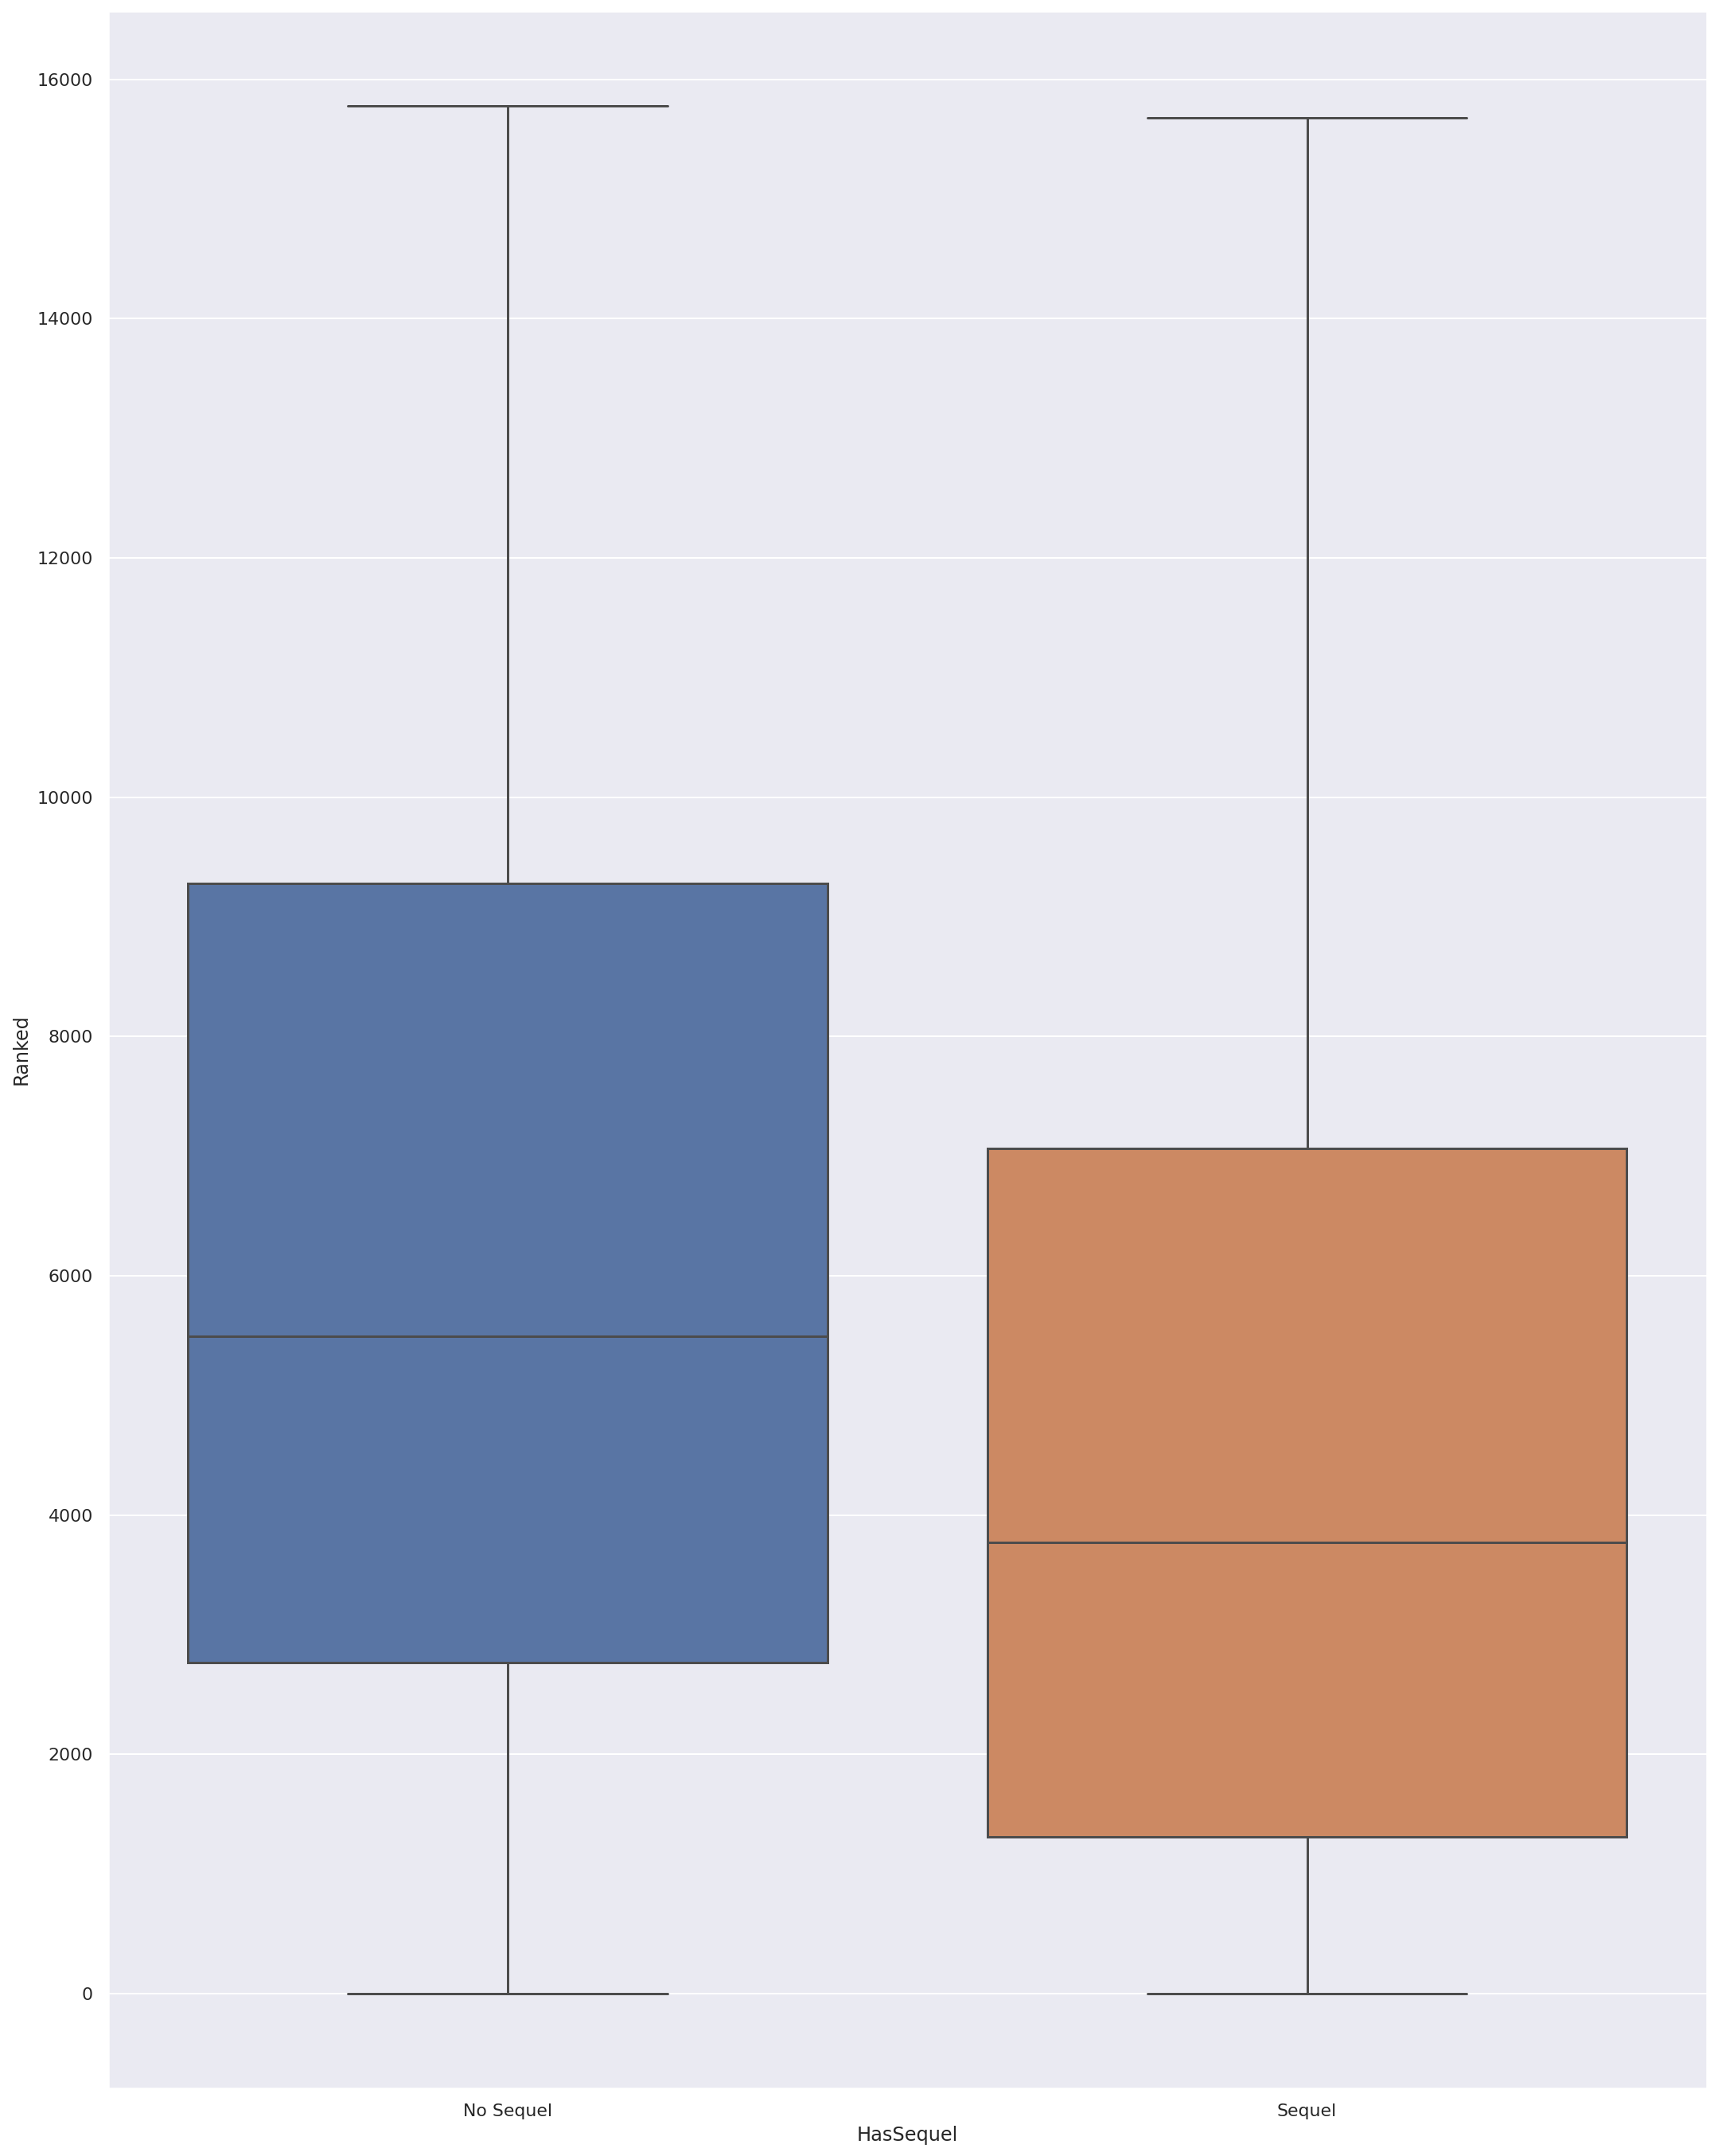

In [4]:
def haha(x):
    result = 0;
    try:
        result = float(x)
    except:
        result = 0
    return math.ceil(result)
animedata["Ranked"] = animedata["Ranked"].apply(haha)
f, axes = plt.subplots(1, 1, figsize=(18, 24))
sb.boxplot(x = 'HasSequel', y = 'Ranked', data = animedata, ax = axes)

## For rank, a lower number is better.

## The figure above shows that anime with sequels tend to have better ranks on lists. Since they have a lower Q1, lower median, and a lower Q3, it shows that at each interval, animes with sequels are better ranked.



<AxesSubplot:xlabel='isManga', ylabel='count'>

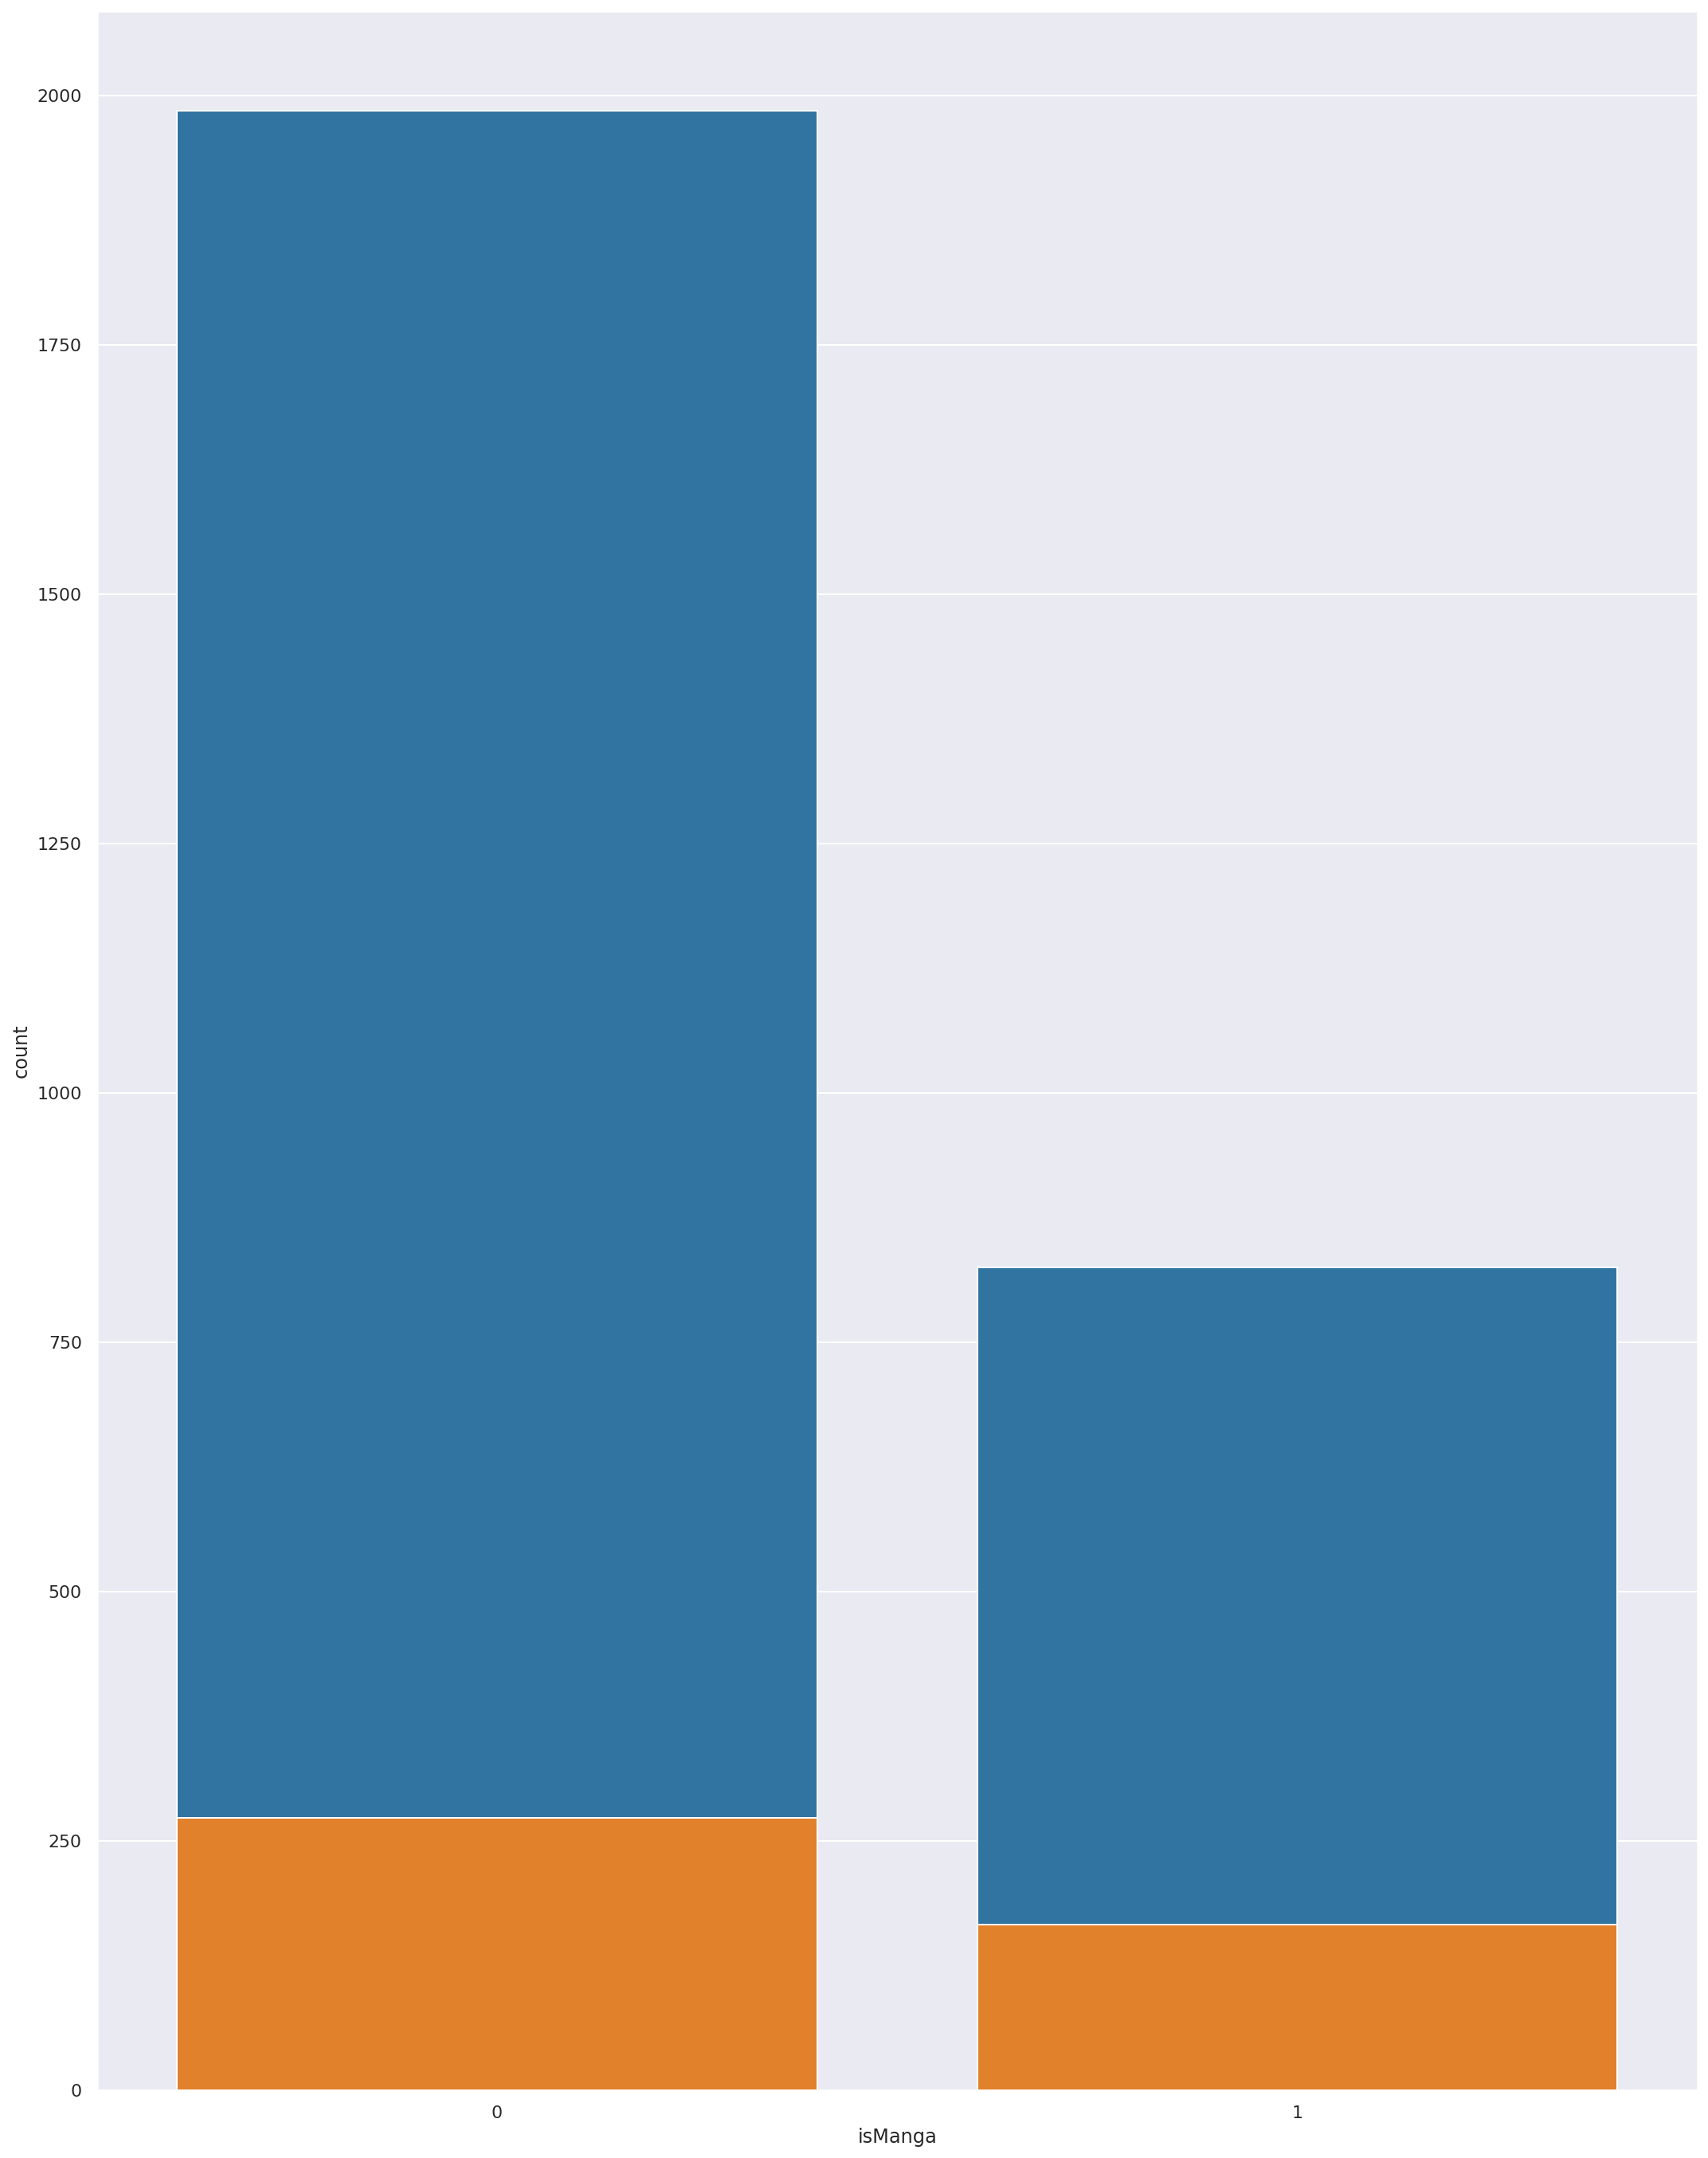

In [5]:
f, axes = plt.subplots(1, 1, figsize=(18, 24))
sb.countplot(x="isManga", data=animedata, color="tab:blue")
sb.countplot(x="isManga", data=animedata[animedata["HasSequel"] == "Sequel"], color="tab:orange")

# Orange: Animes with Sequels

# Blue: Animes with no Sequels

# From the barplot above, we can see based on the proportion of the orange bars, that animes with manga as their source material are less likely to have a sequel compared to animes with non\-manga source material.



In [6]:
mangasDF = animedata[animedata["isManga"] == 1]
nomangasDF = animedata[animedata["isManga"] == 0]
SequelMangaCount = mangasDF[animedata["HasSequel"] == "Sequel"].count()
SequelnoMangaCount = nomangasDF[animedata["HasSequel"] == "Sequel"].count()
MangaCount = mangasDF.count()
noMangaCount = nomangasDF.count()

percentage = SequelMangaCount / MangaCount * 100
print("Percentage of Sequel Mangas: ", percentage)

percentage = SequelnoMangaCount / noMangaCount * 100
print("Percentage of Sequel Non-Mangas: ", percentage)

Percentage of Sequel Mangas:  Unnamed: 0        20.121212
MAL_ID            20.121212
Name              20.121212
Score             20.121212
Genres            20.121212
English name      20.121212
Japanese name     20.121212
Type              20.121212
Episodes          20.121212
Aired             20.121212
Premiered         20.121212
Producers         20.121212
Licensors         20.121212
Studios           20.121212
Source            20.121212
Duration          20.121212
Rating            20.121212
Ranked            20.121212
Popularity        20.121212
Members           20.121212
Favorites         20.121212
Watching          20.121212
Completed         20.121212
On-Hold           20.121212
Dropped           20.121212
Plan to Watch     20.121212
Score-10          20.121212
Score-9           20.121212
Score-8           20.121212
Score-7           20.121212
Score-6           20.121212
Score-5           20.121212
Score-4           20.121212
Score-3           20.121212
Score-2           

/tmp/ipykernel_685/3976939051.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  SequelMangaCount = mangasDF[animedata["HasSequel"] == "Sequel"].count()
/tmp/ipykernel_685/3976939051.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  SequelnoMangaCount = nomangasDF[animedata["HasSequel"] == "Sequel"].count()
